Let's start by loading in the data that Rafa used in the video. Remember to click on "Raw" to download individual files from github.

- dat = read.csv("femaleMiceWeights.csv")

The observed difference between high fat diet and control was calculated like so:

- mean(dat[13:24,2]) - mean(dat[1:12,2])

Let's make a plot of these two groups: a strip chart of the weights. We're going to use some of the functions that we used from the assessments in Week 1, split() and soon sapply().

- s = split(dat[,2], dat[,1])
- stripchart(s, vertical=TRUE, col=1:2)

Let's add the means to the plot as well:

- abline(h=sapply(s, mean), col=1:2)

In [1]:
getwd()

[1] "/Users/neurochoi/Study/R/PH525.1x/Week2"

In [4]:
library(downloader)
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extdata/femaleMiceWeights.csv"
filename <- "femaleMiceWeights.csv"
if(!file.exists(filename)) download(url, destfile = filename)

In [5]:
data <- read.csv("femaleMiceWeights.csv")

In [7]:
head(data)

  Diet Bodyweight
1 chow      21.51
2 chow      28.14
3 chow      24.04
4 chow      23.45
5 chow      23.68
6 chow      19.79

In [9]:
data[13:24, ]
data[1:12, ]

   Diet Bodyweight
13   hf      25.71
14   hf      26.37
15   hf      22.80
16   hf      25.34
17   hf      24.97
18   hf      28.14
19   hf      29.58
20   hf      30.92
21   hf      34.02
22   hf      21.90
23   hf      31.53
24   hf      20.73

   Diet Bodyweight
1  chow      21.51
2  chow      28.14
3  chow      24.04
4  chow      23.45
5  chow      23.68
6  chow      19.79
7  chow      28.40
8  chow      20.98
9  chow      22.51
10 chow      20.10
11 chow      26.91
12 chow      26.25

In [10]:
s <- split(data[,2], data[,1])

In [11]:
s

$chow
 [1] 21.51 28.14 24.04 23.45 23.68 19.79 28.40 20.98 22.51 20.10 26.91 26.25

$hf
 [1] 25.71 26.37 22.80 25.34 24.97 28.14 29.58 30.92 34.02 21.90 31.53 20.73


In [12]:
sapply(s, mean)

    chow       hf 
23.81333 26.83417 

In [14]:
lapply(s, mean)

$chow
[1] 23.81333

$hf
[1] 26.83417


In [15]:
tapply(data[,2], data[,1], mean)

    chow       hf 
23.81333 26.83417 

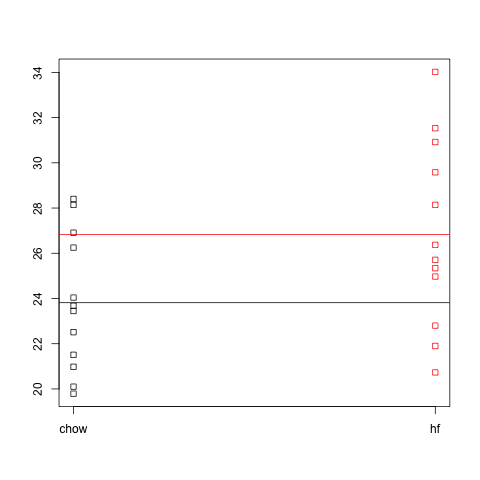

In [16]:
stripchart(s, vertical=T, col=1:2)
abline(h=sapply(s, mean), col=1:2)

## QUESTION 1.1  (1/1 point)

#### How many of the high fat mice weigh less than the mean of the control mice (chow)?

In [20]:
idx_hf <- which(data[,1]=="hf")
idx_chow <- which(data[,1] == "chow")

In [26]:
sum(data[idx_hf,2] < mean(data[idx_chow,2]))

[1] 3

## QUESTION 1.2  (1/1 point)

#### How many of the control mice (chow) weigh more than the mean of the high fat mice?

In [27]:
sum(data[idx_chow, 2] > mean(data[idx_hf, 2]))

[1] 3

## SAMPLE()

In the next video, Rafa will use the sample() function in R to generate random samples of a population.

Before watching that, let's try it out in your R session. Continuing from the code above where we split the weights by diet, s[["hf"]] or equivalently s$hf gives the weights for the high fat diet mice. Save that to a new vector 'highfat':

- highfat = s[["hf"]]

Now print the values for highfat:

- highfat

Now try the following command:

- sample(highfat, 6)

You can press the UP arrow and ENTER to reproduce the command multiple times. The function sample() goes into the 'highfat' vector and chooses 6 values at random (6 is the second argument to sample, which is called the 'size' of the sample). With the default argument settings, sample() will only pick an observation once, so it's like drawing cards from a deck without putting the cards back in the deck. Because all of the value in 'highfat' are unique, they will only show up one time in the sample of 3 using the above line of code.

In the R console, type out ?sample and hit ENTER. Read the argument descriptions for x, size and replace.

There is an argument to sample() called 'replace' which toggles whether or not an observation can be chosen more than once (whether to replace the observations back in the population after they are chosen once). The default setting for 'replace' is set to FALSE, so if we don't say anything, the sample() function will not choose an observation more than once.

Try the following command a few times:

- sample(highfat, 6, replace=TRUE)

You should notice that some of the time, there are repeated values in the sample. This is because we changed the setting of 'replace' to allow for multiple draws of the same obseration.

In the following video, we will be using sample() with replace=FALSE.

In [28]:
s

$chow
 [1] 21.51 28.14 24.04 23.45 23.68 19.79 28.40 20.98 22.51 20.10 26.91 26.25

$hf
 [1] 25.71 26.37 22.80 25.34 24.97 28.14 29.58 30.92 34.02 21.90 31.53 20.73


In [31]:
highfat <- s[["hf"]]
highfat

 [1] 25.71 26.37 22.80 25.34 24.97 28.14 29.58 30.92 34.02 21.90 31.53 20.73

In [32]:
sample(highfat, 6) ## 비복원 추출

[1] 30.92 25.71 24.97 34.02 31.53 25.34

In [33]:
sample(highfat, 6, replace= TRUE) ## 복원 추출

[1] 30.92 26.37 25.34 29.58 28.14 29.58

## QUESTION 1.3  (1/1 point)

Finally, we have a short problem showing a trick with calculating proportions. If we have a logical vector, for example produced by the logical expression,

- highfat	> 30

... a convenient trick is to use this logical vector directly in functions which usually work on numeric values. What happens inside of the R function is that the TRUE is turned into a 1, and the FALSE is turned into a 0. This happens automatically, so you don't need to convert the vector type yourself:

- as.numeric(highfat > 30)

For example if we want to know the number of the high fat diet mice that weigh over 30:

- sum(highfat > 30)

The proportion of high fat diet mice over 30 is the sum of high fat diet mice over 30 divided by the number of high fat diet mice, in other words, the mean of a vector of 1s and 0s. 

#### What is the proportion of high fat diet mice over 30?

In [34]:
highfat > 30

 [1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE

In [36]:
as.numeric(highfat > 30)

 [1] 0 0 0 0 0 0 0 1 1 0 1 0

In [37]:
sum(highfat > 30)  ## True의 갯수

[1] 3

In [40]:
(sum(highfat > 30)/length(highfat))
mean(highfat > 30)

[1] 0.25

[1] 0.25

Now let's load the population data for the control mice (link is here).

- population = read.csv("femaleControlsPopulation.csv")

Because this is just one column of data, as you can see with head(), let's just extract the one column as a vector:

- population = population[,1]

In [41]:
library(downloader)
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extdata/femaleControlsPopulation.csv"
filename <- "femaleControlspopulation.csv"
if(!file.exists(filename)) download(url, destfile = filename)

In [42]:
population <- read.csv("femaleControlspopulation.csv")

In [43]:
head(population)

  Bodyweight
1      27.03
2      24.80
3      27.02
4      28.07
5      23.55
6      22.72

In [44]:
str(population)

'data.frame':	225 obs. of  1 variable:
 $ Bodyweight: num  27 24.8 27 28.1 23.6 ...


In [45]:
population <- population[,1]

In [46]:
population

  [1] 27.03 24.80 27.02 28.07 23.55 22.72 24.82 21.60 23.98 26.60 19.24 21.43
 [13] 22.73 20.10 20.60 21.49 24.73 27.92 27.51 19.88 20.72 24.00 25.08 25.27
 [25] 22.08 20.52 23.39 19.87 17.95 31.83 21.71 29.99 20.89 29.60 22.77 26.03
 [37] 36.84 26.25 22.93 28.25 23.84 20.53 24.10 24.79 23.68 21.86 27.25 21.55
 [49] 24.12 23.07 20.43 24.82 25.43 22.12 20.99 23.28 25.78 22.00 20.74 21.51
 [61] 26.85 25.54 22.51 21.92 21.32 23.59 26.14 20.27 29.60 24.77 22.36 21.65
 [73] 22.08 26.59 24.60 22.19 29.19 25.14 23.19 27.36 23.53 23.54 18.41 28.14
 [85] 23.34 20.11 18.08 21.03 24.23 19.67 22.66 26.66 20.69 27.42 21.91 16.82
 [97] 24.47 23.96 23.18 28.80 26.37 23.61 26.07 27.75 23.70 23.73 24.49 22.87
[109] 29.23 21.46 22.12 33.47 24.96 26.15 24.89 19.41 26.36 26.47 23.19 22.32
[121] 20.03 23.51 21.35 21.58 22.27 23.09 23.88 24.04 27.15 18.80 28.07 24.46
[133] 25.42 20.28 24.06 15.51 22.51 15.94 19.90 19.44 22.18 25.97 25.96 23.12
[145] 20.98 24.78 22.56 20.36 16.05 17.95 22.71 28.22 21.50 20.3

## QUESTION 2.1  (1/1 point)

####What's the control population mean?

In [47]:
mean(population)

[1] 23.89338

## RANDOM SAMPLES

The idea of a random variable, is that we pick at random some samples from the population and then calculate the mean. So depending on which samples we pick, the mean changes, and therefore we say that the mean of a sample of the population is a random variable. In R, we can make a random sample using the sample() function:

- sample(population, 12)

We can calculate the mean for a sample in the normal way:

- mean(sample(population, 12))

In the video Rafa showed how to perform the whole experiment (pick two groups of 12 and calculate the difference in means) 10,000 times using a for loop. Here we'll try a more concise way to do many random samples, using the replicate() function in R. The replicate() function takes two arguments, which are the number of times to replicate, and then an expression: the command you want to replicate. First let's try out making a random sample of one group of 12 mice from the population and calculating the mean:

- sampleMean = replicate(10000, mean(sample(population, 12)))
- head(sampleMean)

We can't quiz you on the values you get, because these are random and will be different on everyone's computer! (Although there is an extra command in R to make sure we all get the same result from a random sample command.) Let's plot the different means that we got, spreading them out one at a time along the x axis:

- plot(sampleMean)

We can also use replicate() to perform the same operation that Rafa did in the video: calculating the difference between two random samples of 12 from the control mice:

- null = replicate(10000, mean(sample(population, 12)) - mean(sample(population, 12)))

Take a look at a few of these 10,000 differences, and plot them along the x-axis, like we did previously for the mean of 12 random mice:

- head(null)
- plot(null)

In [48]:
sampleMean <- replicate(10000, mean(sample(population, 12)))
head(sampleMean)

[1] 25.62083 24.04500 24.49917 23.76500 23.51000 23.57667

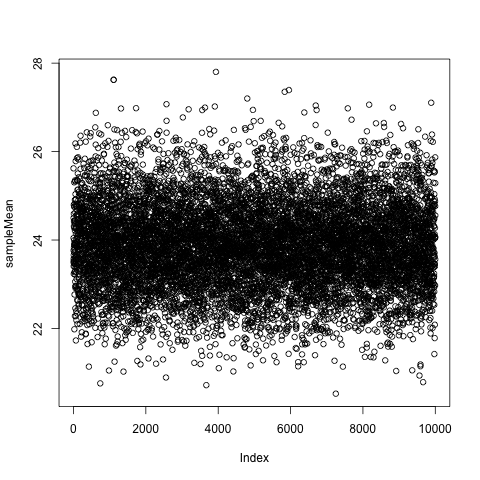

In [49]:
plot(sampleMean)

In [50]:
null <- replicate(10000, mean(sample(population, 12) - mean(sample(population, 12))))
head(null)

[1]  0.4916667 -1.9758333  2.2266667 -0.6875000 -1.5258333 -0.1441667

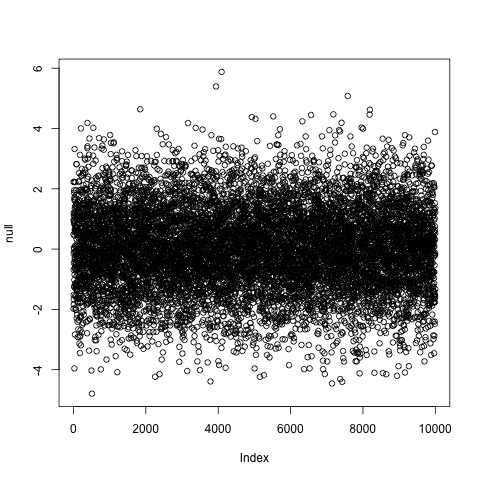

In [51]:
plot(null)

In the previous assessments, we created a vector of differences between means of random samples from the control population. This gives us a sense of the null distribution of differences if there is no true effect of a high fat diet. Let's recreate that vector:

- null = replicate(10000, mean(sample(population, 12)) - mean(sample(population, 12)))

The simple visualization of stacking the values which are close, in order to see the spread, is incredibly useful. Instead of actually writing the values on the plot, a more common visualization (which we will see again in Week 4), is a histogram. The histogram also puts the values into bins along the x-axis, but instead of writing the value, we just draw a vertical bar with the height equal to the number of values that fell in that bin:

- hist(null)

Let's return to the original difference we observed between the mice fed high fat diets and control mice:

- diff = mean(dat[13:24,2]) - mean(dat[1:12,2])

Now what do we see when we add this difference to the histogram:

- abline(v=diff, col="red")

If we look for the number of null distribution values to the right of the red line, we would say "we calculated the probability of observing a larger difference from the null distribution". This is sometimes called a "one-tailed" probability, because we only look at one "tail" of the histogram (the left and right sides where the bars become short). 

We can also add the negative of the difference:

- abline(v=-diff, col="red")

By looking at the tails on both sides of the histogram, we can say "we calculated the probability of observing as extreme a difference from the null distribution". This is sometimes called a "two-tailed" probability. And as Rafa said in the video, this probability is commonly referred to as a p-value.

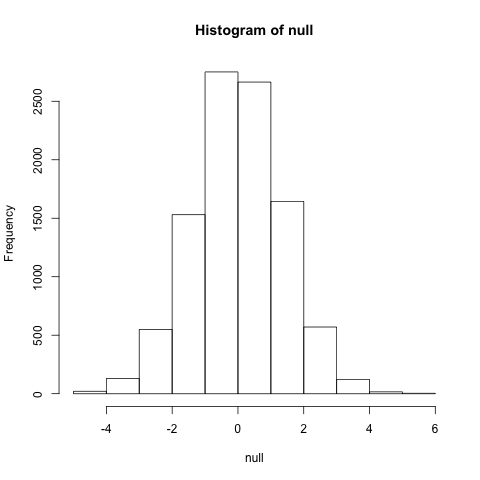

In [52]:
hist(null)

In [53]:
head(data)

  Diet Bodyweight
1 chow      21.51
2 chow      28.14
3 chow      24.04
4 chow      23.45
5 chow      23.68
6 chow      19.79

In [54]:
str(data)

'data.frame':	24 obs. of  2 variables:
 $ Diet      : Factor w/ 2 levels "chow","hf": 1 1 1 1 1 1 1 1 1 1 ...
 $ Bodyweight: num  21.5 28.1 24 23.4 23.7 ...


In [57]:
idx_hf <- which(data$Diet == "hf")
idx_chow <- which(data$Diet == "chow")

In [58]:
diff <- mean(data[idx_hf, 2] - mean(data[idx_chow, 2]))
diff

[1] 3.020833

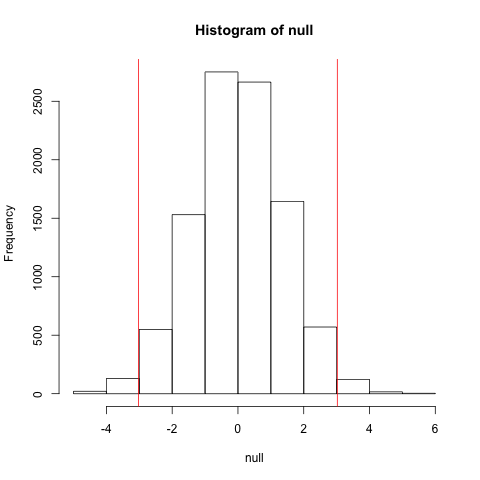

In [60]:
hist(null)
abline(v =  diff, col = "red")
abline(v=-diff, col="red")

## QUESTION 3.1  (1 point possible)

Because everyone's random samples are different on different computers, and this was done 10,000 times, everyone's null vector will be slightly different. Therefore, the following questions which involve the null distribution have an allowable range. We have calculated the range such that all students will have answers which fall in the range.

#### What is the one-tailed probability of seeing as big a difference as we observed, calculated from your null distribution?

In [63]:
mean(null > diff)

[1] 0.0135

## QUESTION 3.2  (1 point possible)

#### What is the two-tailed probability of seeing as big a difference as we observed, calculated from your null distribution?

In [66]:
mean(null > abs(diff) && null < -abs(diff))

[1] 0

In [68]:
mean(null > abs(diff))

[1] 0.0135

In [69]:
mean(abs(null) > abs(diff))

[1] 0.0275